In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


## Pre-Task: Describe the goals of your study

## DATA DICTIONARY

|Title|Description|Type|
|------|------|-------|
|PassengerId|ID of passenger|integer|
|Survived|Survival of passenger (0 = No; 1 = Yes)|integer|
|Pclass|Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|integer|
|Name|Name of passenger|string|
|Sex|Sex of passenger|string|
|Age|Age of passenger|float|
|SibSp|Number of Siblings/Spouses Aboard|integer|
|Parch|Number of Parents/Children Aboard|integer|
|Ticket|Ticket Number|string|
|Fare|Passenger fare|float|
|Cabin|Cabin|string|
|Embarked|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|string|

## Part 1: Aquire the Data

In [10]:
# psql -h dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com -p 5432 -U dsi_student titanic
# password: gastudents

#### 1. Connect to the remote database

In [21]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import connection

In [22]:
engine = create_engine(connection.params)
pd.read_sql("SELECT * FROM pg_catalog.pg_tables WHERE schemaname='public'", con=engine)

schemaname tablename   tableowner tablespace hasindexes hasrules hastriggers
0     public     train          dsi       None       True    False       False
1     public    table1  dsi_student       None       True    False       False

In [24]:
sql = """
SELECT * FROM train
"""

pd.read_sql(sql, con=engine)

index  PassengerId  Survived  Pclass  \
0        0            1         0       3   
1        1            2         1       1   
2        2            3         1       3   
3        3            4         1       1   
4        4            5         0       3   
5        5            6         0       3   
6        6            7         0       1   
7        7            8         0       3   
8        8            9         1       3   
9        9           10         1       2   
10      10           11         1       3   
11      11           12         1       1   
12      12           13         0       3   
13      13           14         0       3   
14      14           15         0       3   
15      15           16         1       2   
16      16           17         0       3   
17      17           18         1       2   
18      18           19         0       3   
19      19           20         1       3   
20      20           21         0       2   
21      21           22         1       2   
22      22           23         1       3   
23      23           24         1       1   
24      24           25         0       3   
25      25           26         1       3   
26      26           27         0       3   
27      27           28         0       1   
28      28           29         1       3   
29      29           30         0       3   
..     ...          ...       ...     ...   
861    861          862         0       2   
862    862          863         1       1   
863    863          864         0       3   
864    864          865         0       2   
865    865          866         1       2   
866    866          867         1       2   
867    867          868         0       1   
868    868          869         0       3   
869    869          870         1       3   
870    870          871         0       3   
871    871          872         1       1   
872    872          873         0       1   
873    873          874         0       3   
874    874          875         1       2   
875    875          876         1       3   
876    876          877         0       3   
877    877          878         0       3   
878    878          879         0       3   
879    879          880         1       1   
880    880          881         1       2   
881    881          882         0       3   
882    882          883         0       3   
883    883          884         0       2   
884    884          885         0       3   
885    885          886         0       3   
886    886          887         0       2   
887    887          888         1       1   
888    888          889         0       3   
889    889          890         1       1   
890    890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Mi

#### 2. Query the database and aggregate the data

In [141]:
# How many people in each Pclass

sql = """
SELECT "Pclass", Count("Pclass") FROM train
GROUP BY "Pclass"
"""

pclass_cnt = pd.read_sql(sql, con=engine)
pclass_cnt

Pclass  count
0       1    216
1       2    184
2       3    491

In [158]:
# How many male and females

sql = """
SELECT "Sex", Count("Sex") FROM train
GROUP BY "Sex"
"""

sex_cnt = pd.read_sql(sql, con=engine)
sex_cnt

Sex  count
0    male    577
1  female    314

In [159]:
# How many people embarked from each port

sql = """
SELECT "Embarked", COUNT("Embarked") FROM train
GROUP BY "Embarked"
"""

port_cnt = pd.read_sql(sql, con=engine)
port_cnt

Embarked  count
0        Q     77
1     None      0
2        S    644
3        C    168

In [162]:
# Survival rate of males and females

sql = """
SELECT "Sex", "Survived", COUNT("Survived") AS Cnt_Surv
FROM train
GROUP BY "Sex", "Survived"
ORDER BY "Sex"
"""

surv_rate = pd.read_sql(sql, con=engine)
surv_rate

Sex  Survived  cnt_surv
0  female         1       233
1  female         0        81
2    male         0       468
3    male         1       109

In [201]:
# sql = """
# SELECT "Age", COUNT("Sex") AS ct_sex, "Sex"
# From train
# GROUP BY "Sex", "Age"
# ORDER BY "Age" DESC
# """
# pd.read_sql(sql, con=engine)
## Result is 124 missing Age

In [186]:
# change table into dataframe

sql = """
SELECT * FROM train
"""

df = pd.read_sql(sql, con=engine)

#### 5. What are the risks and assumptions of our data? 

## Part 2: Exploratory Data Analysis

#### 1. Describe the Data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
index          891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [51]:
df.head()

index  PassengerId  Survived  Pclass  \
0      0            1         0       3   
1      1            2         1       1   
2      2            3         1       3   
3      3            4         1       1   
4      4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500  None        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250  None        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  None        S

In [231]:
df.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [218]:
# Copy the data to keep in original form
data = df.copy()

In [220]:
# change NaN to 0 in Cabin and Embarked

data.Cabin.fillna(0, inplace=True)
data.Embarked.fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
index          891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [240]:
# drop NaN in Age
data.dropna(axis=0, how='any', subset=['Age'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
index          714 non-null int64
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          714 non-null object
Embarked       714 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 78.1+ KB


#### 2. Visualize the Data

In [221]:
import seaborn as sns

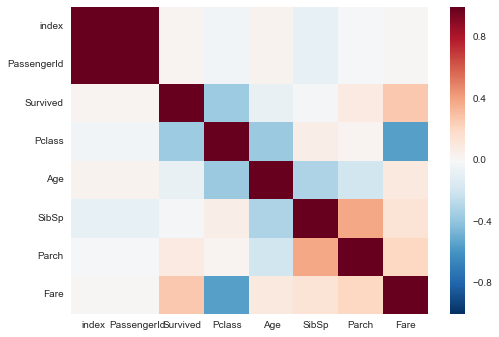

In [241]:
sns.heatmap(data.corr())

In [232]:
# print pclass_cnt
# pd.DataFrame(pclass_cnt).plot(kind='barh')

In [233]:
# print sex_cnt
# pd.DataFrame(sex_cnt).plot(kind='barh')

In [234]:
# print port_cnt
# pd.DataFrame(port_cnt).plot(kind='barh')

In [235]:
# print surv_rate
# pd.DataFrame(surv_rate).plot(kind='barh')

## Part 3: Data Wrangling

#### 1. Create Dummy Variables for *Sex* 

In [242]:
# change male =  1, female = 2
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'male' else 0)

## Part 4: Logistic Regression and Model Validation

#### 1. Define the variables that we will use in our classification analysis

In [244]:
predictors = data[['Sex','Age','Pclass','Fare']]
X = predictors
Y = data['Survived'].values

#### 2. Transform "Y" into a 1-Dimensional Array for SciKit-Learn

#### 3. Conduct the logistic regression

In [245]:
lr = LogisticRegression()
lr.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [246]:
lr.score(X, Y)

0.79411764705882348

#### 4. Examine the coefficients to see our correlations

In [247]:
lr.coef_

array([[-2.27164301, -0.02546796, -0.9493806 ,  0.00301798]])

#### 6. Test the Model by introducing a *Test* or *Validaton* set 

In [253]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 7. Predict the class labels for the *Test* set

In [254]:
lr.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0])

#### 8. Predict the class probabilities for the *Test* set

In [256]:
lr.predict_proba(X_test)

array([[ 0.47063181,  0.52936819],
       [ 0.19895076,  0.80104924],
       [ 0.26949916,  0.73050084],
       [ 0.79787152,  0.20212848],
       [ 0.55585779,  0.44414221],
       [ 0.89534262,  0.10465738],
       [ 0.7667482 ,  0.2332518 ],
       [ 0.70930143,  0.29069857],
       [ 0.74828532,  0.25171468],
       [ 0.63580694,  0.36419306],
       [ 0.87363283,  0.12636717],
       [ 0.46891551,  0.53108449],
       [ 0.34690448,  0.65309552],
       [ 0.90128485,  0.09871515],
       [ 0.74180414,  0.25819586],
       [ 0.40679449,  0.59320551],
       [ 0.787734  ,  0.212266  ],
       [ 0.32393907,  0.67606093],
       [ 0.44591569,  0.55408431],
       [ 0.80805413,  0.19194587],
       [ 0.86930235,  0.13069765],
       [ 0.33495652,  0.66504348],
       [ 0.20669949,  0.79330051],
       [ 0.88993065,  0.11006935],
       [ 0.89158015,  0.10841985],
       [ 0.32393907,  0.67606093],
       [ 0.09174348,  0.90825652],
       [ 0.67034762,  0.32965238],
       [ 0.5292889 ,

#### 9. Evaluate the *Test* set

In [257]:
lr.score(X_test, Y_test)

0.8046511627906977

#### 10. Cross validate the test set

#### 11. Check the Classification Report

#### 12. What do the classification metrics tell us?

#### 13. Check the Confusion Matrix

#### 14. What does the Confusion Matrix tell us? 

#### 15. Plot the ROC curve

#### 16. What does the ROC curve tell us?

## Part 5: Gridsearch

#### 1. Use GridSearchCV with logistic regression to search for optimal parameters 

- Use the provided parameter grid. Feel free to add if you like (such as n_jobs).
- Use 5-fold cross-validation.

In [ ]:
logreg_parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear']
}

#### 2. Print out the best parameters and best score. Are they better than the vanilla logistic regression?

#### 3. Explain the difference between the difference between the L1 (Lasso) and L2 (Ridge) penalties on the model coefficients.

#### 4. What hypothetical situations are the Ridge and Lasso penalties useful?

#### 5. [BONUS] Explain how the regularization strength (C) modifies the regression loss function. Why do the Ridge and Lasso penalties have their respective effects on the coefficients?

#### 6.a. [BONUS] You decide that you want to minimize false positives. Use the predicted probabilities from the model to set your threshold for labeling the positive class to need at least 90% confidence. How and why does this affect your confusion matrix?

## Part 6: Gridsearch and kNN

#### 1. Perform Gridsearch for the same classification problem as above, but use KNeighborsClassifier as your estimator

At least have number of neighbors and weights in your parameters dictionary.

#### 2. Print the best parameters and score for the gridsearched kNN model. How does it compare to the logistic regression model?

#### 3. How does the number of neighbors affect the bias-variance tradeoff of your model?

#### [BONUS] Why?

#### 4. In what hypothetical scenario(s) might you prefer logistic regression over kNN, aside from model performance metrics?

#### 5. Fit a new kNN model with the optimal parameters found in gridsearch. 

#### 6. Construct the confusion matrix for the optimal kNN model. Is it different from the logistic regression model? If so, how?

#### 7. [BONUS] Plot the ROC curves for the optimized logistic regression model and the optimized kNN model on the same plot.

## Part 7: [BONUS] Precision-recall

#### 1. Gridsearch the same parameters for logistic regression but change the scoring function to 'average_precision'

`'average_precision'` will optimize parameters for area under the precision-recall curve instead of for accuracy.

#### 2. Examine the best parameters and score. Are they different than the logistic regression gridsearch in part 5?

#### 3. Create the confusion matrix. Is it different than when you optimized for the accuracy? If so, why would this be?

#### 4. Plot the precision-recall curve. What does this tell us as opposed to the ROC curve?

[See the sklearn plotting example here.](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

## Part 8: [VERY BONUS] Decision trees, ensembles, bagging

#### 1. Gridsearch a decision tree classifier model on the data, searching for optimal depth. Create a new decision tree model with the optimal parameters.

#### 2. Compare the performace of the decision tree model to the logistic regression and kNN models.

#### 3. Plot all three optimized models' ROC curves on the same plot. 

#### 4. Use sklearn's BaggingClassifier with the base estimator your optimized decision tree model. How does the performance compare to the single decision tree classifier?

#### 5. Gridsearch the optimal n_estimators, max_samples, and max_features for the bagging classifier.

#### 6. Create a bagging classifier model with the optimal parameters and compare it's performance to the other two models.